# k-means clustering

k-means clustering takes in k number of clusters that could potentially exist in a data set and outputs associations of each member of the dataset to a cluster in the range [1, k]. k-means initially randomly associates each data point to a random cluster in the range [1, k] and determines the centroid of each cluster. Later, in an iterative manner, the members associations as well as cluster centroids of k clusters are updated till a convergence criterion is achieved. 

### The Iris Dataset

We know that the IRIS dataset consists of various samples with four features per data point. These are:

 - length of the sepals (cm)
 - lenght of the petals (cm)
 - width of the sepals (cm) and
 - width of the petals (cm).
We shall learn to use these features and perform clustering using k-means to see various cluster realizations.

Load all relevant libraries:
```python
import pandas as pd
import plotly.tools as tls
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
iris = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
iris.head()
```

<img src='../../../images/k-means.png'/>

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
Let us perform clustering by selecting number of clusters as 5 using the KMeans function. The max iteration can be specified which allows the K-Means algorithm to stop at a certain point if it doesnt reach a tolerance level (tol) below 0.0001 in that many steps.
```python
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
iris_train, iris_test = train_test_split(iris, train_size=0.9)
k_means = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)
```
We can now fit the instantiated k_means to the features:

```python
k_means.fit(iris_train[features])
```
The predict function provides predictions on which cluster the data in the test set will be associated to: 

```python
iris_y = k_means.predict(iris_test[features])
```


## Exercise:

K-Means associates each data point to a cluster. We can see these associations post clustering in labels_ variable.

- What is the type of labels_ data structure?
- Map the associations of each data point in X to the cluster it belongs to by appending it to the dataframe. Create a new column called 'cluster' that contains the cluster number or id that the row associates itself with.
- Print the first 5 rows of the training dataset with the cluster column.

In [3]:
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split

import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

iris_train, iris_test = train_test_split(iris, train_size=0.9)

k_means = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)
k_means.fit(iris_train[features])
iris_y = k_means.predict(iris_test[features])



### Solution

```python
iris_train = iris_train.assign(cluster = k_means.labels_)
iris_train.head(5)
```

## Advanced k-means

### Let us prepare the 'normal' data

To start with clustering, let us consider the datasets which follow the Gaussian 'normal' distribution with a low variance. To do so, we can synthesize a dataset using sklearn make_blob feature. The centers of these gaussian blobs need to be specified. In two dimensions, we need to specify the centers, standard deviation and number of samples as 2000. Here is the gaussian normal distribution function:

$$P(x) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{{\frac{ - \left( {x - \mu } \right)^2 }{2\sigma^2 } }}$$

We can create this using make_blobs function. 


### k-means 

* Basic algorithm. Good to test out the linearity of the clusters.
* Given $d$ observations, $\{\mathbf{x}_1,\dots,\mathbf{x}_d\}$, the observations are associated with k clusters, $\mathbf{C} = \{C_1,\dots,C_k\}$

$$\underset{\mathbf{C}}{\textrm{argmin}} \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} \left|\left| \mathbf{x} - \mathbf{\mu}_i \right|\right|^2 \;$$,

Let us create 5 blobs:

```python
from sklearn.datasets import make_blobs
centers = [[1, 1], [-1, -1], [1, -1], [-2,2], [0,2]]
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=0.3,
                                             random_state=0)
                                             ```


<br/>

## Exercise:
- Visualize the blob from the X dataset by using the seaborn pairplot as sns.pairplot() and assign it to the variable g
Hint - <p>Use g = sns.pairplot(x_vars=<1st dimension column>, y_vars= <2nd dimension column>, hue="y", data = blob_df)</p>

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import mixture 
from sklearn.mixture import GaussianMixture

import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#Create clusters using make_blob feature
centers = [[1, 1], [-1, -1], [1, -1],[-2,2],[0,2]]
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=0.3,
                            random_state=0)

# Transform the data into a dataframe
blob_df = pd.DataFrame({'X_0':X[:,0], 'X_1':X[:,1], 'y':y})

# Visualize the pair plot and assign it to the variable g


### Solution

```python
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="y", data = blob_df)
g.fig.set_size_inches(14, 6)
```


<br/><br/><br/>
## ML Engineer's favorite - The k-means

We shall now apply k-means to this dataset and observe its performance.

k-means is used as a basic unsupervised learning algorithm. The procedure follows a simple and easy way to classify a given data set through a fixed number of clusters, apriori.

The Algorithm for K means is as follow -

 - Select the desired number of clusters k
 - Select k initial observations as seeds
 - Calculate average cluster values (cluster centroids) over each variable (for the initial iteration, this will simply be the initial seed observations)
 - Assign each of the other training observations to the cluster with the nearest centroid 
 - Recalculate cluster centroids (averages) based on the assignments from step 4
 - Iterate between steps 4 and 5, stop when the error reduced below a threshold.

<br/>

## Exercise:

 * Form a dataframe with y as the labels and generate a plot.

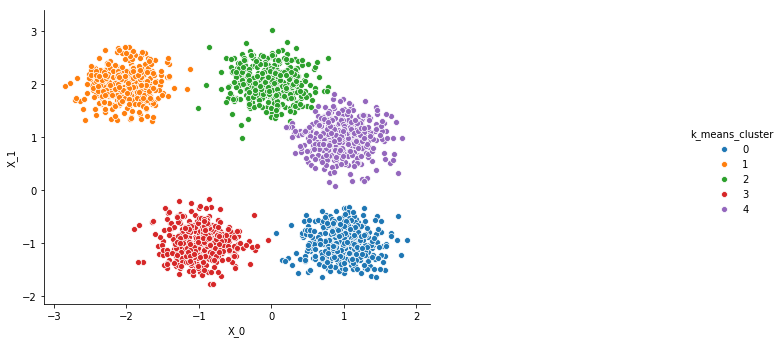

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

#Visualize the k-means clusters


### Solution

```python
blob_df['k_means_cluster'] = labels
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="k_means_cluster", data = blob_df)
g.fig.set_size_inches(14, 6)
sns.despine()
plt.show()
```


<br/><br/><br/>
## Silhouette Scores

The Silhouette Coefficient is a metric to estimate the optimum number of clusters. It uses average intra-cluster distance and average nearest-cluster distance for each sample. Higher the value of the score, the better the estimate. Typically the silhoutte scores go high and then fall peaking at an optimum cluster number. The values lie between -1.0 and 1.0.

```python
k_clusters = []
sil_coeffecients = []

for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters = n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label)
    print("For n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(n_cluster)
    
plt.plot(k_clusters, sil_coeffecients)
plt.ylabel('Silhouette Coefficient'), plt.xlabel('No. of Clusters')
plt.show()
```

<img src='https://s3.amazonaws.com/rfjh/media/silhoutte_scores.png' style='float: left;'/>


<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
## Exercise
* From the above plot retrieve the optimum number of clusters and assign it to the variable k_best. 
* Print it out.


For n_clusters=2, Silhouette Coefficient = 0.4767048868738968
For n_clusters=3, Silhouette Coefficient = 0.5894698242211702
For n_clusters=4, Silhouette Coefficient = 0.6489812676944412
For n_clusters=5, Silhouette Coefficient = 0.6846614624249971
For n_clusters=6, Silhouette Coefficient = 0.6160512978420352
For n_clusters=7, Silhouette Coefficient = 0.5618414207501364
For n_clusters=8, Silhouette Coefficient = 0.4762115692171891
For n_clusters=9, Silhouette Coefficient = 0.40329435834348076
For n_clusters=10, Silhouette Coefficient = 0.3118384422816735


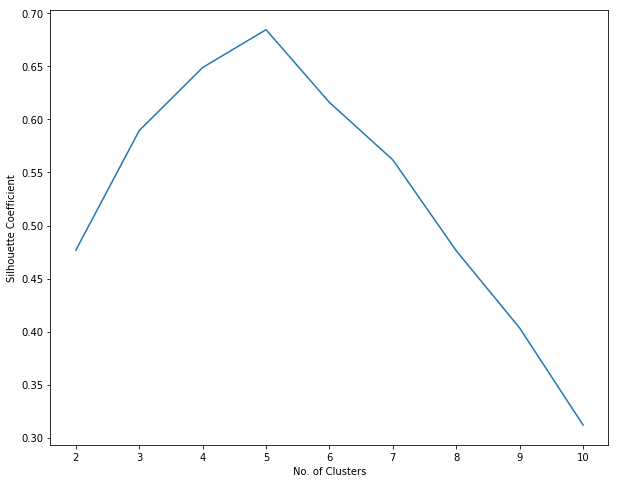

In [12]:
from sklearn.metrics import silhouette_score

k_clusters = []
sil_coeffecients = []

for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters = n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label)
    print("For n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(n_cluster)
    
plt.plot(k_clusters, sil_coeffecients)
plt.ylabel('Silhouette Coefficient'), plt.xlabel('No. of Clusters')
plt.show()



### Solution

```python
sil_best = max(sil_coeffecients)
k_best_index = sil_coeffecients.index(sil_best)
k_best = k_clusters[k_best_index]
print("Optimum Number of Clusters:", k_best)
```